FEniCS tutorial demo program: Poisson equation with Dirichlet conditions. <br>
Test problem is chosen to give an exact solution at all nodes of the mesh.

  $-\nabla^2(u(x)) = f(x)$   in the unit square <br>
         $u(x) = u_D(x)$  on the boundary

In [1]:
from fenics import *
import matplotlib.pyplot as plt

In [3]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
#mesh = Mesh("meshes/mesh115_coarse.xml.gz")
V = FunctionSpace(mesh, 'P', 1)

In [5]:
# Define boundary condition
u_D = Constant(0)

In [6]:
def boundary(x, on_boundary):
    return on_boundary

In [7]:
bc = DirichletBC(V, u_D, boundary)

In [8]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

In [9]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

Solving linear variational problem.


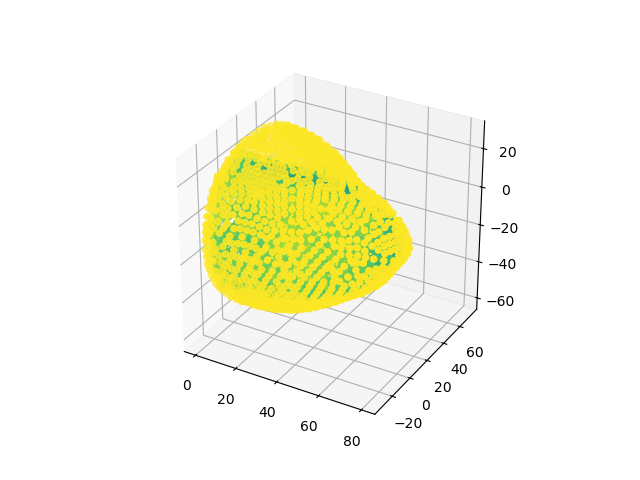

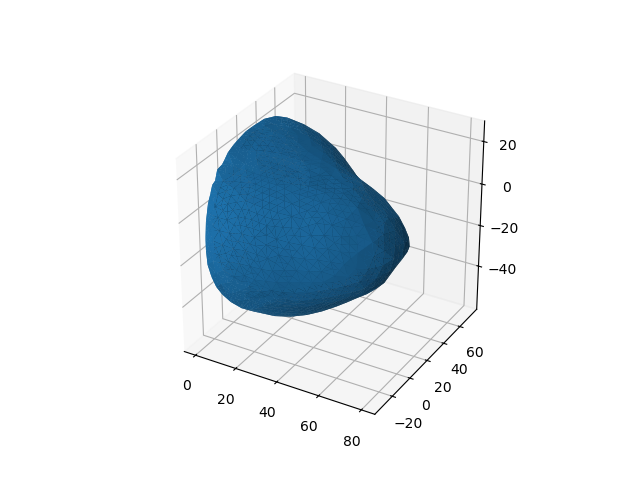

In [10]:
# Plot solution and mesh
%matplotlib widget
plot(u)
plot(mesh)